# document representation

count-based document representation is obtained by LSA (Latent semantic analysis), i.e., term-ducoment matrix factorization by SVD

aggregated word embedding: averaging, summing, or concatenating word embeddings. 

Doc2Vec: an extension of Word2Vec by Le and Mikolov (2014) that explicitly learns document embeddings. Two main variants of Doc2Vec are Distributed Memory (DM) and Distributed Bag of Words (DBOW).

## Term-document matrix

**Term-document matrix**: a corpus of $N$ documents is represented as a matrix $M \in \mathbb{R}^{|V|\times N}$

- Rows: Unique terms in the vocabulary

- Columns: Documents in the collection, represented as a vector $\in \mathbb{R}^{|V|}$

- entry: binary (occurrence), bag-of-words (Frequency),  TF-IDF (weighted frequency)

frequency $M_{ij}$: number of times ith words occurred in jth document

TF-IDF (Term Frequency-Inverse Document Frequency) reflect the importance of a term $t$ in a document $d$, relative to the entire collection of documents.

$$
TF-IDF(t, d) = TF(t, d) \times IDF(t)=(\text{\# t in d})\times \left(log_{10}\frac{N}{1 + \text{\# docs have t}}\right)
$$

## Latent Semantic Analysis

Latent Semantic Analysis (LSA): PCA in NLP

applies singular value decomposition (SVD) to document-term matrix (transpose of term-document matrix) 

$$
M=USV^T
$$

document embeddings are $U_k S_k \in \mathbb{R}^{k \times N}$ 

### binary term-document matrix

When query "natural language processing" to the two documents:

- Document 1: "linguistics semantics viterbi learning"

- Document 2: "welcome to new haven"

**None of the words in the query directly appear in either document**, making it difficult to establish relevance using simple term frequency or TF-IDF approaches.

To overcome this, we can represent documents and queries as **semantic concept vector** by reducing demension from $|V|$ to k (number of latent semantic concepts) 

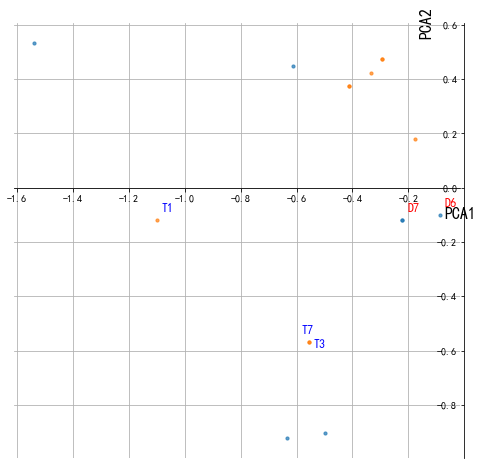

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from adjustText import adjust_text

# Define the dataset
docs = [['T6', 'T9'],
             ['T1', 'T2', 'T5'],
             ['T2', 'T5', 'T8'],
             ['T1', 'T4', 'T6', 'T8', 'T9'],
             ['T1', 'T7'],
             ['T3', 'T7'],
             ['T1', 'T3']]

vocab = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

# Create the term-document matrix
td_matrix = np.zeros((len(docs), len(vocab)))
for i, d in enumerate(docs):
    for t in d:
        j = vocab.index(t)
        td_matrix[i, j] = 1

# document-term matrix is transpose term-document matrix
dt_matrix = td_matrix.T 

# normalize  matrix
td_matrix = td_matrix/np.linalg.norm(td_matrix, axis=0)
dt_matrix = dt_matrix/np.linalg.norm(dt_matrix, axis=0)

# Perform SVD to obtain the left singular vectors, singular values, and right singular vectors
k = 2

U, S, Vt = np.linalg.svd(dt_matrix)
term_embd = dt_matrix@(Vt[:k, :].T)

U, S, Vt = np.linalg.svd(td_matrix)
doc_embed = td_matrix@(Vt[:k, :].T)

# Perform PCA with k=2
# pca = PCA(n_components=2)
# term_embd = pca.fit_transform(dt_matrix)
# doc_embed = pca.fit_transform(td_matrix)
# low-rank approximation
# U_k = U[:, :k]
# S_k = np.diag(S[:k])
# Vt_k = Vt[:k, :]
# doc_embed = U_k @ S_k @ Vt_k

# Plot the PCA results
plt.figure(figsize=(8, 8))
plt.scatter(doc_embed[:, 0], doc_embed[:, 1], s=10, alpha=0.7)
plt.scatter(term_embd[:, 0], term_embd[:, 1], s=10, alpha=0.7)

# Annotate specific terms and documents
terms_to_annotate = [1, 3, 7]
docs_to_annotate = [6, 7]
term_annotations = [plt.annotate(f"T{i}", (term_embd[i-1, 0], term_embd[i-1, 1]), fontsize=12, color='blue', 
                                  xytext=(5, 5), textcoords='offset points') for i in terms_to_annotate]
doc_annotations = [plt.annotate(f"D{j}", (doc_embed[j-1, 0], doc_embed[j-1, 1]), fontsize=12, color='red', 
                                 xytext=(5, 5), textcoords='offset points') for j in docs_to_annotate]

# Use adjustText to avoid annotation overlap
adjust_text(term_annotations + doc_annotations)

# Add grid and axis labels
plt.grid()
plt.xlabel('PCA1', fontsize=16, x=1)
plt.ylabel('PCA2', fontsize=16, y=1)

# Ensure that the plot axes cross at (0, 0)
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')


### Bag of words term-document matrix

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample text data
documents = [
    "I like cat and dog like cat like cat",
    "cat like I and dog",
    "Dog like cat and I"
]

# initialize a CountVectorizer with ngram_range set to desired N-gram value
# For example, (2, 2) for bigrams, (3, 3) for trigrams, etc.
vectorizer = CountVectorizer(ngram_range=(2, 2))

# X is term-document matrix
X = vectorizer.fit_transform(documents)
#  For each sequence, count the occurrences of each unique N-gram and create a feature vector 
#  (3, 7) sparse matrix  where each position corresponds to a unique N-gram and the value represents its frequency

# Extract all the unique N-grams from the dataset
ngram_vocab = vectorizer.get_feature_names_out()
print("ngram vocab:", ngram_vocab)

# Convert the feature vectors to an array and print 
print("term-document matrix:\n", X.toarray()) 

ngram vocab: ['and dog' 'cat and' 'cat like' 'dog like' 'like and' 'like cat']
term-document matrix:
 [[1 1 1 1 0 3]
 [1 0 1 0 1 0]
 [0 1 0 1 0 1]]
